In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Read in training dataset (TSV)
# Filepath will be different; set to repo's filepath when we add the corpus files
train_tsv = pd.read_csv('../Corpora/scicite/tsv/train.tsv', sep='\t', 
                       names=["citingPaperID", "source", "string", "label"]
                       )
train_tsv

,citingPaperID,source,string,label
0,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,explicit,"However, how frataxin interacts with the Fe-S ...",background
1,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,explicit,"In the study by Hickey et al. (2012), spikes w...",background
2,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,explicit,"The drug also reduces catecholamine secretion,...",background
3,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,explicit,By clustering with lowly aggressive close kin ...,background
4,88b86556857f4374842d2af2e359576806239175>a5bb0...,explicit,Ophthalmic symptoms are rare manifestations of...,background
...,...,...,...,...
8238,6f68ccd37718366c40ae6aeedf0b935bf560b215>60ed4...,explicit,"Importantly, the results of Pascalis et al. (2...",background
8239,f2a1c1704f9587c94ed95bc98179dc499e933f5e>574e6...,explicit,"As suggested by Nguena et al, there is a need ...",background
8240,18c97ea2ff60c110cc2a523e0fdf729608cbb083>fc13b...,explicit,Skeletal muscle is also a primary site of dise...,background
8241,4ec9b89857c0b27e8a4bd3745b7358f387773527>81aff...,explicit,ACTIVATION OF TRANSCRIPTION FACTORS Roles for ...,method


In [4]:
### Unique "source" values
print(train_tsv["source"].unique(), train_tsv["source"].value_counts())

['explicit' 'properNoun' 'acronym' 'acronymParen' 'andPhrase' 'etAlPhrase'
 nan] explicit        7886
properNoun       142
acronym          131
acronymParen      53
andPhrase         19
etAlPhrase        10
Name: source, dtype: int64


In [5]:
### Unique "label" values
print(train_tsv["label"].unique(), train_tsv["label"].value_counts())

['background' 'method' 'result'] background    4840
method        2294
result        1109
Name: label, dtype: int64


In [6]:
### Create a matrix of counts with source-label pair combinations
source_label_dict = {}; source_label_list = []
for index, row in train_tsv.iterrows():
    source_label_pair = str(row['source']) + '_' + row['label']
    # Initialize source-label pair in the dictionary and list if it doesn't exist
    if source_label_pair not in list(source_label_dict.keys()):
        source_label_dict[source_label_pair] = 1
        source_label_list.append(source_label_pair)
    # Else, add 1 to dictionary value
    else:
        source_label_dict[source_label_pair] += 1

In [7]:
### Get sorted source-label pair dictionary
sorted_source_label_dict = {}
for source_label_pair in sorted(source_label_list):
    sorted_source_label_dict[source_label_pair] = source_label_dict[source_label_pair]
sorted_source_label_dict

{'acronymParen_background': 2,
 'acronymParen_method': 46,
 'acronymParen_result': 5,
 'acronym_background': 2,
 'acronym_method': 96,
 'acronym_result': 33,
 'andPhrase_method': 14,
 'andPhrase_result': 5,
 'etAlPhrase_method': 7,
 'etAlPhrase_result': 3,
 'explicit_background': 4835,
 'explicit_method': 2021,
 'explicit_result': 1030,
 'nan_result': 2,
 'properNoun_background': 1,
 'properNoun_method': 110,
 'properNoun_result': 31}

<BarContainer object of 17 artists>

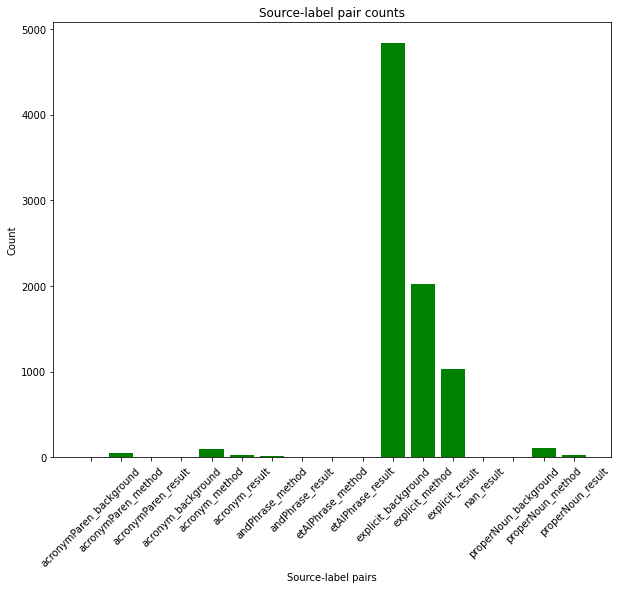

In [8]:
### Histogram for all source-label pair counts in the training dataset
plt.figure(figsize=(10, 8))
plt.title("Source-label pair counts")
plt.xlabel("Source-label pairs"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.bar(sorted_source_label_dict.keys(), sorted_source_label_dict.values(), color='g')

In [39]:
noExplicit_pairs = [pair for pair in sorted(source_label_list) if "explicit_" not in pair]
noExplicit_pairs

['acronymParen_background',
 'acronymParen_method',
 'acronymParen_result',
 'acronym_background',
 'acronym_method',
 'acronym_result',
 'andPhrase_method',
 'andPhrase_result',
 'etAlPhrase_method',
 'etAlPhrase_result',
 'nan_result',
 'properNoun_background',
 'properNoun_method',
 'properNoun_result']

In [40]:
### Get sorted source-label pair dictionary without Explicit source
noExplicit_source_label_dict = {}
for source_label_pair in noExplicit_pairs:
    noExplicit_source_label_dict[source_label_pair] = source_label_dict[source_label_pair]
noExplicit_source_label_dict

{'acronymParen_background': 2,
 'acronymParen_method': 46,
 'acronymParen_result': 5,
 'acronym_background': 2,
 'acronym_method': 96,
 'acronym_result': 33,
 'andPhrase_method': 14,
 'andPhrase_result': 5,
 'etAlPhrase_method': 7,
 'etAlPhrase_result': 3,
 'nan_result': 2,
 'properNoun_background': 1,
 'properNoun_method': 110,
 'properNoun_result': 31}

<BarContainer object of 14 artists>

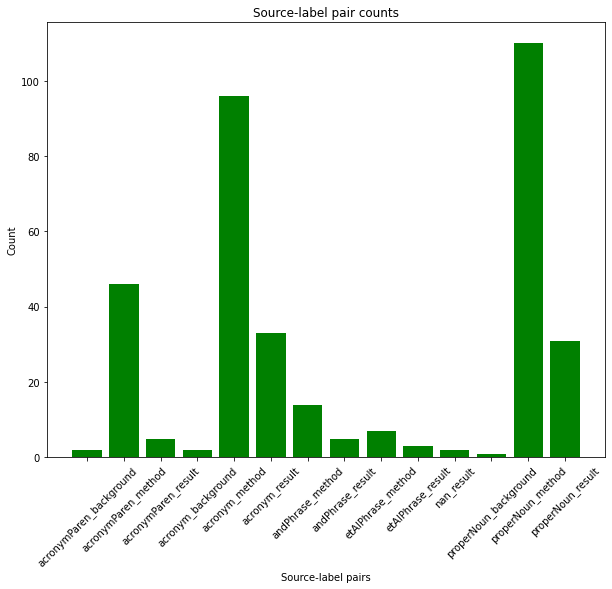

In [41]:
### Histogram for all source-label pair counts in the training dataset excluding Explicit source
plt.figure(figsize=(10, 8))
plt.title("Source-label pair counts")
plt.xlabel("Source-label pairs"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.bar(noExplicit_source_label_dict.keys(), noExplicit_source_label_dict.values(), color='g')

In [21]:
test = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
test

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
np.sum(test, axis=1)

array([ 3, 12, 21])

In [53]:
columns=["Precision", "Accuracy", "F1-Score"]
test_df = pd.DataFrame(np.zeros((4, 3)), columns=columns)
test_df

,Precision,Accuracy,F1-Score
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0


In [54]:
test_df["Precision"][0] = 2
test_df

,Precision,Accuracy,F1-Score
0,2.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0


In [56]:
test_df.iloc[3] = ([0] * 3)
test_df

,Precision,Accuracy,F1-Score
0,2.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0


In [42]:
[[0]] * 3

[[0], [0], [0]]